In [16]:
data <- read.csv("measurements_03_47.csv",header=T)
summary(data)

      Size             Type                Time         
 Min.   :    100   Length:75          Min.   :0.000009  
 1st Qu.:   1000   Class :character   1st Qu.:0.000210  
 Median :  10000   Mode  :character   Median :0.016149  
 Mean   : 222220                      Mean   :0.051255  
 3rd Qu.: 100000                      3rd Qu.:0.043877  
 Max.   :1000000                      Max.   :0.242869  

In [17]:
library(dplyr)
library(ggplot2)

In [21]:
data_summarized <- data %>% group_by(Type, Size) %>% summarize(n=n(), mean = mean(Time), sd = sd(Time), se = sd/sqrt(n))
print(data_summarized)

`summarise()` has grouped output by 'Type'. You can override using the
`.groups` argument.


# A tibble: 15 × 6
# Groups:   Type [3]
   Type             Size     n      mean          sd          se
   <chr>           <int> <int>     <dbl>       <dbl>       <dbl>
 1 " Built-in"       100     5 0.0000126 0.00000114  0.000000510
 2 " Built-in"      1000     5 0.000208  0.00000383  0.00000171 
 3 " Built-in"     10000     5 0.00172   0.0000117   0.00000521 
 4 " Built-in"    100000     5 0.0204    0.000126    0.0000565  
 5 " Built-in"   1000000     5 0.242     0.000630    0.000282   
 6 " Parallel"       100     5 0.00375   0.000519    0.000232   
 7 " Parallel"      1000     5 0.0176    0.00338     0.00151    
 8 " Parallel"     10000     5 0.0174    0.000970    0.000434   
 9 " Parallel"    100000     5 0.0478    0.00361     0.00161    
10 " Parallel"   1000000     5 0.162     0.00580     0.00259    
11 " Sequential"     100     5 0.0000098 0.000000447 0.000000200
12 " Sequential"    1000     5 0.000128  0.00000110  0.000000490
13 " Sequential"   10000     5 0.00170   0.0000467

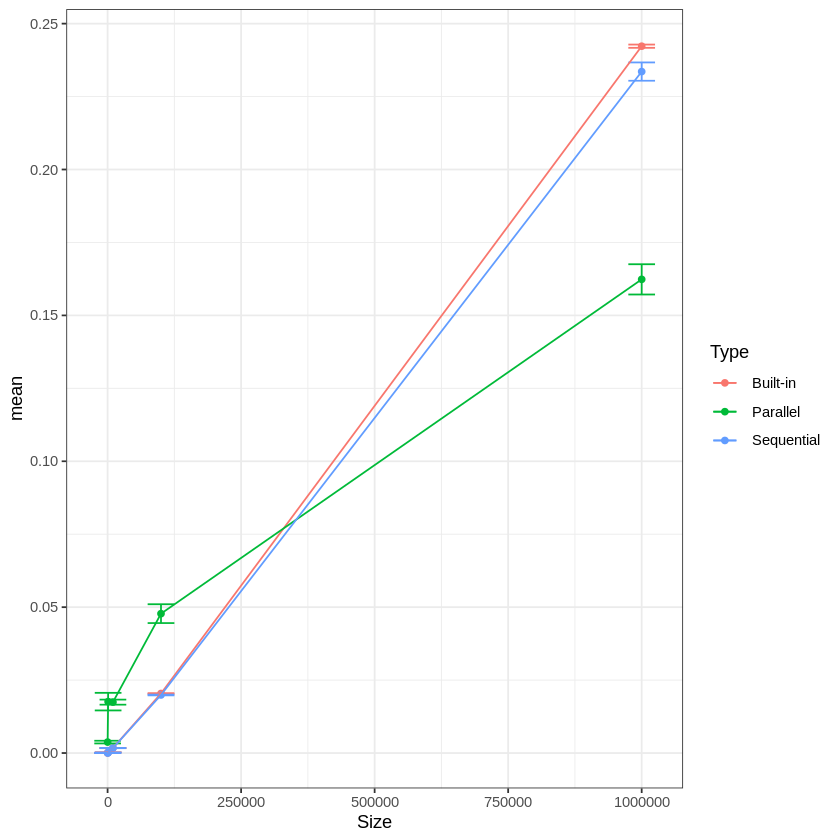

In [36]:
data_summarized %>% ggplot(aes(x=Size, y= mean, color=Type)) + geom_point() + geom_errorbar(aes(ymin = mean-(2*se), ymax = mean+(2*se)), width = 50000) + theme_bw() + geom_line()